# `neural_network_without_race_pairwise_winners.ipynb`

### Author: Anthony Hein

#### Last updated: 11/14/2021

# Overview:

Use the datasets
* `X_train_preprocess_without_race.csv`
* `X_dev_preprocess_without_race.csv`
* `X_test_preprocess_without_race.csv`

and the targets in
* `X_train_pairwise_winner_labels.csv`
* `X_dev_pairwise_winner_labels.csv`
* `X_test_pairwise_winner_labels.csv`

to make a neural network model that tries to predict the pairwise winner between each pair of runners.

---

## Setup

In [1]:
from datetime import datetime
import git
import os
import re
from typing import List
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `X_train_preprocess_without_race.csv`

In [5]:
X_train = pd.read_csv(f"{BASE_DIR}/data/analysis/X_train_preprocess_without_race.csv", low_memory=False)
X_train.head()

,horse1_age,horse1_saddle,horse1_decimalPrice,horse1_isFav,horse1_outHandicap,horse1_RPR,horse1_weight,horse1_jockey_d_last_race,horse1_jockey_d_first_race,horse1_jockey_prev_1_position,...,horse2_jockey_prev_3_position_rain,horse2_jockey_prev_1_finishing_time_ratio_rain,horse2_jockey_prev_2_finishing_time_ratio_rain,horse2_jockey_prev_3_finishing_time_ratio_rain,horse2_jockey_prev_1_position_rhum,horse2_jockey_prev_2_position_rhum,horse2_jockey_prev_3_position_rhum,horse2_jockey_prev_1_finishing_time_ratio_rhum,horse2_jockey_prev_2_finishing_time_ratio_rhum,horse2_jockey_prev_3_finishing_time_ratio_rhum
0,0.200000,0.230769,0.196970,0.0,0.0,0.73125,0.692308,0.007631,0.236544,0.100,...,0.050,0.805104,0.780139,0.783438,0.100,0.025,0.025,0.805104,0.799642,0.780139
1,0.400000,0.038462,0.072222,0.0,0.0,0.73125,0.743590,0.005050,0.236544,0.100,...,0.100,0.801416,0.781238,0.794160,0.075,0.050,0.075,0.801416,0.800487,0.785703
2,0.133333,0.423077,0.098485,0.0,0.0,0.65000,0.705128,0.000740,0.237283,0.025,...,0.100,0.799909,0.780139,0.786816,0.025,0.100,0.025,0.799642,0.806486,0.780139
3,0.133333,0.423077,0.098485,0.0,0.0,0.65000,0.705128,0.000740,0.237283,0.025,...,0.075,0.800176,0.781623,0.781870,0.050,0.075,0.050,0.801163,0.801416,0.780963
4,0.133333,0.192308,0.090278,0.0,0.0,0.66250,0.730769,0.000740,0.234655,0.050,...,0.100,0.799642,0.783601,0.785468,0.125,0.100,0.025,0.803191,0.805104,0.780139


In [6]:
X_train.shape

(800666, 144)

---

## Load `X_dev_preprocess_without_race.csv`

In [7]:
X_dev = pd.read_csv(f"{BASE_DIR}/data/analysis/X_dev_preprocess_without_race.csv", low_memory=False)
X_dev.head()

,horse1_age,horse1_saddle,horse1_decimalPrice,horse1_isFav,horse1_outHandicap,horse1_RPR,horse1_weight,horse1_jockey_d_last_race,horse1_jockey_d_first_race,horse1_jockey_prev_1_position,...,horse2_jockey_prev_3_position_rain,horse2_jockey_prev_1_finishing_time_ratio_rain,horse2_jockey_prev_2_finishing_time_ratio_rain,horse2_jockey_prev_3_finishing_time_ratio_rain,horse2_jockey_prev_1_position_rhum,horse2_jockey_prev_2_position_rhum,horse2_jockey_prev_3_position_rhum,horse2_jockey_prev_1_finishing_time_ratio_rhum,horse2_jockey_prev_2_finishing_time_ratio_rhum,horse2_jockey_prev_3_finishing_time_ratio_rhum
0,0.285714,0.105263,0.200000,0.0,0.0,0.608392,0.769231,0.001516,0.629407,0.250,...,0.200,0.828972,0.837641,0.843255,0.075,0.050,0.275,0.834583,0.828972,0.853796
1,0.285714,0.210526,0.157143,0.0,0.0,0.258741,0.769231,0.000445,0.286087,0.075,...,0.075,0.826039,0.826039,0.842799,0.025,0.025,0.075,0.826039,0.826039,0.842799
2,0.285714,0.210526,0.157143,0.0,0.0,0.258741,0.769231,0.000445,0.286087,0.075,...,0.125,0.826413,0.841758,0.844367,0.125,0.050,0.275,0.843955,0.826413,0.841758
3,0.285714,0.210526,0.157143,0.0,0.0,0.258741,0.769231,0.000445,0.286087,0.075,...,0.050,0.832401,0.832114,0.828366,0.100,0.075,0.050,0.832401,0.837064,0.828519
4,0.285714,0.210526,0.157143,0.0,0.0,0.258741,0.769231,0.000445,0.286087,0.075,...,0.175,0.857255,0.835266,0.834946,0.150,0.025,0.200,0.857255,0.826039,0.837392


In [8]:
X_dev.shape

(228766, 144)

---

## Load `X_test_preprocess_without_race.csv`

In [9]:
X_test = pd.read_csv(f"{BASE_DIR}/data/analysis/X_test_preprocess_without_race.csv", low_memory=False)
X_test.head()

,horse1_age,horse1_saddle,horse1_decimalPrice,horse1_isFav,horse1_outHandicap,horse1_RPR,horse1_weight,horse1_jockey_d_last_race,horse1_jockey_d_first_race,horse1_jockey_prev_1_position,...,horse2_jockey_prev_3_position_rain,horse2_jockey_prev_1_finishing_time_ratio_rain,horse2_jockey_prev_2_finishing_time_ratio_rain,horse2_jockey_prev_3_finishing_time_ratio_rain,horse2_jockey_prev_1_position_rhum,horse2_jockey_prev_2_position_rhum,horse2_jockey_prev_3_position_rhum,horse2_jockey_prev_1_finishing_time_ratio_rhum,horse2_jockey_prev_2_finishing_time_ratio_rhum,horse2_jockey_prev_3_finishing_time_ratio_rhum
0,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.200,0.865544,0.847264,0.853154,0.025,0.200,0.300,0.840533,0.850856,0.864844
1,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.150,0.864781,0.840533,0.855519,0.025,0.025,0.025,0.840533,0.840533,0.840533
2,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.075,0.838534,0.843337,0.846422,0.200,0.100,0.125,0.853412,0.842583,0.847859
3,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.250,0.851685,0.849673,0.854624,0.150,0.250,0.200,0.849673,0.854624,0.858051
4,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.250,0.847892,0.842776,0.862423,0.175,0.075,0.275,0.853634,0.844529,0.862845


In [10]:
X_test.shape

(114392, 144)

---

## Load Pairwise Winner Labels

In [11]:
X_train_pairwise_winner_labels = np.loadtxt(f"{BASE_DIR}/data/analysis/x_train_pairwise_winner_labels.csv",
                                            dtype=int,
                                            delimiter=',')

In [12]:
X_dev_pairwise_winner_labels = np.loadtxt(f"{BASE_DIR}/data/analysis/X_dev_pairwise_winner_labels.csv",
                                          dtype=int,
                                          delimiter=',')

In [13]:
X_test_pairwise_winner_labels = np.loadtxt(f"{BASE_DIR}/data/analysis/X_test_pairwise_winner_labels.csv",
                                           dtype=int,
                                           delimiter=',')

## Neural Network Architecture

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Set the device to use
# CUDA refers to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Fixing Random Seed for Reproducibility
torch.manual_seed(0)
np.random.seed(0)

In [15]:
X_train_tensor = torch.from_numpy(X_train.to_numpy()).float().to(device)

y_train_tensor = torch.from_numpy(X_train_pairwise_winner_labels).float().to(device)
y_train_tensor = torch.reshape(y_train_tensor, (-1, 1))

X_dev_tensor = torch.from_numpy(X_dev.to_numpy()).float().to(device)

y_dev_tensor = torch.from_numpy(X_dev_pairwise_winner_labels).float().to(device)
y_dev_tensor = torch.reshape(y_dev_tensor, (-1, 1))

In [16]:
X_train_dataset = list(zip(X_train_tensor, y_train_tensor))
X_dev_dataset = list(zip(X_dev_tensor, y_dev_tensor))

In [17]:
class Net(nn.Module):
    def __init__(self, input_size, num_layers, layers_size):
        super(Net, self).__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, layers_size)])
        self.hidden_layers.extend([nn.Linear(layers_size, layers_size) for i in range(1, num_layers-1)])
        self.output = nn.Linear(layers_size, 1)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        z = x
        for layer in self.hidden_layers:
            z = self.activation(layer(z))
        return self.output(z)

In [18]:
class Trainer():
    def __init__(self, net, optim, loss_function, train_loader):
        self.net = net
        self.optim = optim
        self.loss_function = loss_function
        self.train_loader = train_loader

    def train(self, epochs, verbose=True):
        losses = []
        for epoch in range(epochs):
            epoch_loss = 0.0
            epoch_steps = 0
            for data in self.train_loader:
                
                X = data[0].to(device)
                y = data[1].to(device)
                
                self.optim.zero_grad()

                preds = self.net.forward(X)

                loss = self.loss_function(preds, y)

                loss.backward()

                self.optim.step()

                epoch_loss += loss.item()
                epoch_steps += 1

            losses.append(epoch_loss / epoch_steps)
            if verbose: print("epoch [%d]: loss %.3f" % (epoch+1, losses[-1]))
        return losses

In [19]:
## Hyperparameters

num_epochs = 15
batch_size = 256
learning_rate = 0.02

In [20]:
train_loader = DataLoader(dataset=X_train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
dev_loader = DataLoader(dataset=X_dev_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [21]:
net = Net(X_train_tensor.shape[1], 1, 425)
net = net.to(device)
opt = optim.Adam(net.parameters(), lr=learning_rate)
loss_function = nn.BCEWithLogitsLoss()

trainer = Trainer(net=net, optim=opt, loss_function=loss_function, train_loader=train_loader)

losses = trainer.train(num_epochs)

epoch [1]: loss 0.239
epoch [2]: loss 0.185
epoch [3]: loss 0.173
epoch [4]: loss 0.168
epoch [5]: loss 0.163
epoch [6]: loss 0.162
epoch [7]: loss 0.159
epoch [8]: loss 0.157
epoch [9]: loss 0.155
epoch [10]: loss 0.154
epoch [11]: loss 0.153
epoch [12]: loss 0.153
epoch [13]: loss 0.151
epoch [14]: loss 0.150
epoch [15]: loss 0.149


Good hyperparameters:

* num_epochs = 10, batch_size = 256, learning_rate = 0.025, Net(X_train_tensor.shape[1], 1, [100])
* num_epochs = 20, batch_size = 256, learning_rate = 0.025, Net(X_train_tensor.shape[1], 1, [100])
* num_epochs = 10, batch_size = 256, learning_rate = 0.025, Net(X_train_tensor.shape[1], 1, [150])
* num_epochs = 10, batch_size = 256, learning_rate = 0.025, Net(X_train_tensor.shape[1], 1, [200])
* num_epochs = 10, batch_size = 256, learning_rate = 0.025, Net(X_train_tensor.shape[1], 1, [300])
* num_epochs = 10, batch_size = 256, learning_rate = 0.025, Net(X_train_tensor.shape[1], 1, [400])
* num_epochs = 20, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [400])
* num_epochs = 20, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [500])
* num_epochs = 20, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [450])
* num_epochs = 20, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [425]), 93.03, 92.74
* num_epochs = 20, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [437])
* num_epochs = 20, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [412]), 93.12, 92.66
* num_epochs = 20, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [420]), 93.24, 92.54
* num_epochs = 20, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [416]), 93.31, 92.54
* num_epochs = 30, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [425]), 92.99, 90.88
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [425]), 92.93, 92.20

In [22]:
err = 0
tot = 0
with torch.no_grad():
    for data in train_loader:
        
        X = data[0].to(device)
        y = data[1].to(device)

        # raw output of network for X
        preds = torch.round(torch.sigmoid(net(X)))

        tot += y.size(0)

        err += torch.sum(y != preds)

acc_percent = 100 - (100 * err / tot)
print('Accuracy of NN prediction on training set: %5.2f%%' % acc_percent)

Accuracy of NN prediction on training set: 94.59%


In [23]:
err = 0
tot = 0
with torch.no_grad():
    for data in dev_loader:
        
        X = data[0].to(device)
        y = data[1].to(device)

        # raw output of network for X
        preds = torch.round(torch.sigmoid(net(X)))

        tot += y.size(0)

        err += torch.sum(y != preds)

acc_percent = 100 - (100 * err / tot)
print('Accuracy of NN prediction on dev set: %5.2f%%' % acc_percent)

Accuracy of NN prediction on dev set: 94.24%


Text(0, 0.5, 'loss')

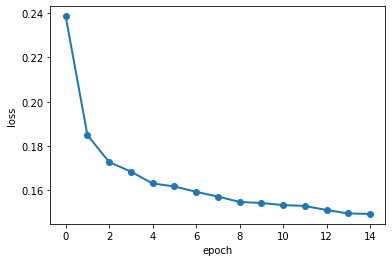

In [24]:
plt.plot(losses, linewidth=2, linestyle='-', marker='o')
plt.xlabel("epoch")
plt.ylabel("loss")

In [25]:
def accuracy(net, data_loader):
    err = 0
    tot = 0
    with torch.no_grad():
        for data in data_loader:

            X = data[0].to(device)
            y = data[1].to(device)

            # raw output of network for X
            preds = torch.round(torch.sigmoid(net(X)))

            tot += y.size(0)

            err += torch.sum(y != preds)

    acc_percent = 100 - (100 * err / tot)
    return acc_percent

In [26]:
## Fixing Random Seed for Reproducibility
torch.manual_seed(0)
np.random.seed(0)

rows = []

hyperparameter_space = np.arange(100,500,25)

for hidden_size in hyperparameter_space:
    print(hidden_size)
    for _ in range(5):
        net = Net(X_train_tensor.shape[1], 1, hidden_size)
        net = net.to(device)
        opt = optim.Adam(net.parameters(), lr=learning_rate)
        loss_function = nn.BCEWithLogitsLoss()

        trainer = Trainer(net=net, optim=opt, loss_function=loss_function, train_loader=train_loader)
        trainer.train(num_epochs, verbose=False)

        rows.append({
            "hidden_size": hidden_size,
            "train_acc": accuracy(net, train_loader),
            "dev_acc": accuracy(net, dev_loader),
        })

100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475


In [27]:
pd.DataFrame(rows).to_csv(f"{BASE_DIR}/data/analysis/neural_network/all_features.csv")

In [28]:
df = pd.DataFrame(rows)
df

,hidden_size,train_acc,dev_acc
0,100,tensor(93.9203),tensor(93.5366)
1,100,tensor(93.1923),tensor(93.1362)
2,100,tensor(94.4997),tensor(94.3475)
3,100,tensor(94.7985),tensor(94.3847)
4,100,tensor(94.8440),tensor(94.4183)
...,...,...,...
75,475,tensor(91.6786),tensor(91.1569)
76,475,tensor(92.2448),tensor(91.8069)
77,475,tensor(95.2292),tensor(94.9175)
78,475,tensor(94.9587),tensor(94.6893)


In [29]:
df['train_acc'] = df['train_acc'].map(lambda x: x.item())
df['dev_acc'] = df['dev_acc'].map(lambda x: x.item())
df

,hidden_size,train_acc,dev_acc
0,100,93.920311,93.536629
1,100,93.192291,93.136215
2,100,94.499702,94.347496
3,100,94.798454,94.384659
4,100,94.844040,94.418312
...,...,...,...
75,475,91.678551,91.156906
76,475,92.244827,91.806915
77,475,95.229225,94.917511
78,475,94.958694,94.689331


In [30]:
df_agg = df.groupby('hidden_size').mean().reset_index()
df_agg

,hidden_size,train_acc,dev_acc
0,100,94.250960,93.964662
1,125,93.213974,93.156326
2,150,94.451120,94.225191
3,175,93.378662,93.059457
4,200,92.962834,92.620058
5,225,93.036098,92.773839
6,250,93.158595,92.719810
7,275,93.768314,93.449466
8,300,93.950087,93.724503
9,325,93.436038,93.176347


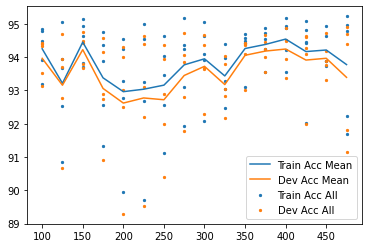

In [31]:
plt.scatter(df['hidden_size'], df['train_acc'], label="Train Acc All", s=5)
plt.scatter(df['hidden_size'], df['dev_acc'], label="Dev Acc All", s=5)
plt.plot(df_agg['hidden_size'], df_agg['train_acc'], label="Train Acc Mean")
plt.plot(df_agg['hidden_size'], df_agg['dev_acc'], label="Dev Acc Mean")
plt.legend()
plt.show()

---

## Select Model and Save

In [32]:
net = Net(X_train_tensor.shape[1], 1, 150)
net = net.to(device)
opt = optim.Adam(net.parameters(), lr=learning_rate)
loss_function = nn.BCEWithLogitsLoss()

trainer = Trainer(net=net, optim=opt, loss_function=loss_function, train_loader=train_loader)

losses = trainer.train(num_epochs)

epoch [1]: loss 0.241
epoch [2]: loss 0.186
epoch [3]: loss 0.177
epoch [4]: loss 0.167
epoch [5]: loss 0.162
epoch [6]: loss 0.157
epoch [7]: loss 0.150
epoch [8]: loss 0.151
epoch [9]: loss 0.147
epoch [10]: loss 0.146
epoch [11]: loss 0.142
epoch [12]: loss 0.142
epoch [13]: loss 0.140
epoch [14]: loss 0.138
epoch [15]: loss 0.138


In [33]:
err = 0
tot = 0
with torch.no_grad():
    for data in train_loader:
        
        X = data[0].to(device)
        y = data[1].to(device)

        # raw output of network for X
        preds = torch.round(torch.sigmoid(net(X)))

        tot += y.size(0)

        err += torch.sum(y != preds)

acc_percent = 100 - (100 * err / tot)
print('Accuracy of NN prediction on training set: %5.2f%%' % acc_percent)

Accuracy of NN prediction on training set: 95.02%


In [34]:
err = 0
tot = 0
with torch.no_grad():
    for data in dev_loader:
        
        X = data[0].to(device)
        y = data[1].to(device)

        # raw output of network for X
        preds = torch.round(torch.sigmoid(net(X)))

        tot += y.size(0)

        err += torch.sum(y != preds)

acc_percent = 100 - (100 * err / tot)
print('Accuracy of NN prediction on dev set: %5.2f%%' % acc_percent)

Accuracy of NN prediction on dev set: 94.68%


Text(0, 0.5, 'loss')

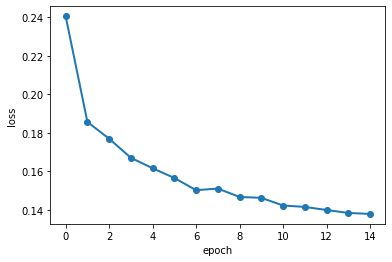

In [35]:
plt.plot(losses, linewidth=2, linestyle='-', marker='o')
plt.xlabel("epoch")
plt.ylabel("loss")

In [36]:
torch.save(net.state_dict(), f"{BASE_DIR}/data/analysis/net_all_features_150_nodes.bin")

---

## Test Set

In [37]:
X_test_tensor = torch.from_numpy(X_test.to_numpy()).float().to(device)

y_test_tensor = torch.from_numpy(X_test_pairwise_winner_labels).float().to(device)
y_test_tensor = torch.reshape(y_test_tensor, (-1, 1))

In [38]:
X_test_dataset = list(zip(X_test_tensor, y_test_tensor))

In [39]:
test_loader = DataLoader(dataset=X_test_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

In [40]:
accuracy(net, test_loader).item()

94.56780242919922

---